# Author: Cicy K Agnes

* Task: To find the total medical costs given medical conditions of patients and other details
*   Model used: Artificial Neural Networks(3 Layered)
*   Loss function: mean absolute error 
*   Python - Keras - Sklearn

* **Results obtained** : 
  * training accuracy: 0.9957 
  *  training loss: 0.0424
  *  val_loss: 0.1450 
  *  val_accuracy: 0.9746
  *  Prediction accuracy :  0.9746
  * Prediction loss: 0.1450 


# Code

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data_simple.csv to data_simple.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv('/content/data_simple.csv', sep=';', header=None)
print(df)

                        0                1                             2   \
0    Hospital Service Area  Hospital County  Operating Certificate Number   
1            New York City            Kings                     7001020.0   
2            New York City            Kings                     7001020.0   
3            Hudson Valley      Westchester                     5957001.0   
4              Long Island          Suffolk                     5154001.0   
..                     ...              ...                           ...   
230          Hudson Valley      Westchester                     5903001.0   
231        Capital/Adirond       Montgomery                     2801001.0   
232          New York City            Kings                     7001020.0   
233        Capital/Adirond          Clinton                      901001.0   
234            Long Island          Suffolk                     5149000.0   

                        3                                                  

# EDA - Exploratory Analysis

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
1,New York City,Kings,7001020.0,1305.0,Maimonides Medical Center,30 to 49,112,M,White,Spanish/Hispanic,...,Minor,Surgical,Medicaid,Self-Pay,NaN,NaN,N,Y,380104.0,118883.77
2,New York City,Kings,7001020.0,1305.0,Maimonides Medical Center,0 to 17,112,M,White,Unknown,...,Minor,Medical,Private Health Insurance,Self-Pay,NaN,2900,N,N,5220.0,809.34
3,Hudson Valley,Westchester,5957001.0,1139.0,Westchester Medical Center,18 to 29,105,F,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,NaN,NaN,NaN,N,Y,13240.0,3184.66
4,Long Island,Suffolk,5154001.0,925.0,Good Samaritan Hospital Medical Center,70 or Older,117,F,White,Not Span/Hispanic,...,Major,Medical,Medicare,Medicaid,NaN,NaN,N,Y,100357.0,17333.39
5,Hudson Valley,Orange,3522000.0,694.0,St Luke's Cornwall Hospital/Newburgh,50 to 69,125,F,Multi-racial,Unknown,...,Major,Medical,Medicare,Medicaid,NaN,NaN,N,Y,47404.37,11781.22
6,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,30 to 49,104,M,White,Spanish/Hispanic,...,Minor,Medical,Medicare,Medicaid,NaN,NaN,N,Y,34996.6,6613.94
7,Finger Lakes,Monroe,2754001.0,471.0,The Unity Hospital of Rochester,70 or Older,146,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,NaN,NaN,N,Y,29765.2,14886.27
8,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,30 to 49,104,F,Black/African American,Not Span/Hispanic,...,Major,Medical,Medicaid,NaN,NaN,NaN,N,Y,119624.18,26778.05
9,New York City,Manhattan,7002024.0,1456.0,Mount Sinai Hospital,50 to 69,103,M,Other Race,Unknown,...,Major,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,90471.6,31206.28


In [4]:
df. columns=df. iloc[0]

In [5]:
df.head(10)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
1,New York City,Kings,7001020.0,1305.0,Maimonides Medical Center,30 to 49,112,M,White,Spanish/Hispanic,...,Minor,Surgical,Medicaid,Self-Pay,NaN,NaN,N,Y,380104.0,118883.77
2,New York City,Kings,7001020.0,1305.0,Maimonides Medical Center,0 to 17,112,M,White,Unknown,...,Minor,Medical,Private Health Insurance,Self-Pay,NaN,2900,N,N,5220.0,809.34
3,Hudson Valley,Westchester,5957001.0,1139.0,Westchester Medical Center,18 to 29,105,F,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,NaN,NaN,NaN,N,Y,13240.0,3184.66
4,Long Island,Suffolk,5154001.0,925.0,Good Samaritan Hospital Medical Center,70 or Older,117,F,White,Not Span/Hispanic,...,Major,Medical,Medicare,Medicaid,NaN,NaN,N,Y,100357.0,17333.39
5,Hudson Valley,Orange,3522000.0,694.0,St Luke's Cornwall Hospital/Newburgh,50 to 69,125,F,Multi-racial,Unknown,...,Major,Medical,Medicare,Medicaid,NaN,NaN,N,Y,47404.37,11781.22
6,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,30 to 49,104,M,White,Spanish/Hispanic,...,Minor,Medical,Medicare,Medicaid,NaN,NaN,N,Y,34996.6,6613.94
7,Finger Lakes,Monroe,2754001.0,471.0,The Unity Hospital of Rochester,70 or Older,146,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,NaN,NaN,N,Y,29765.2,14886.27
8,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,30 to 49,104,F,Black/African American,Not Span/Hispanic,...,Major,Medical,Medicaid,NaN,NaN,NaN,N,Y,119624.18,26778.05
9,New York City,Manhattan,7002024.0,1456.0,Mount Sinai Hospital,50 to 69,103,M,Other Race,Unknown,...,Major,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,90471.6,31206.28


# Drop first row

In [6]:
df = df.iloc[1:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 1 to 234
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Hospital Service Area                234 non-null    object
 1   Hospital County                      234 non-null    object
 2   Operating Certificate Number         234 non-null    object
 3   Permanent Facility Id                234 non-null    object
 4   Facility Name                        234 non-null    object
 5   Age Group                            234 non-null    object
 6   Zip Code - 3 digits                  232 non-null    object
 7   Gender                               234 non-null    object
 8   Race                                 234 non-null    object
 9   Ethnicity                            234 non-null    object
 10  Length of Stay                       234 non-null    object
 11  Type of Admission                    234 non-

In [8]:
print(df.shape)

(234, 34)


In [9]:
df.describe(include="all")

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
count,234,234,234,234,234,234,232,234,234,234,...,234,234,234,144,49,27,234,234,234,234
unique,8,33,91,106,106,5,44,2,4,4,...,4,2,8,8,5,16,1,2,234,234
top,New York City,Manhattan,7002054.0,541.0,North Shore University Hospital,70 or Older,112,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicaid,Self-Pay,3600.0,N,Y,380104.0,118883.77
freq,108,42,14,9,9,64,32,133,135,190,...,127,184,81,49,34,5,234,146,1,1


# Domain 

* CCS is a tool for clustering patient diagnoses and procedures into a manageable 
number of clinically meaningful categories developed at the Agency for Healthcare Research and Quality (AHRQ, formerly known as the Agency for Health Care Policy and Research). 
https://ibis.health.utah.gov/ibisph-view/pdf/resource/CCS.pdf


* All Patients Refined Diagnosis Related Groups (APR DRG) is a classification system that classifies patients according to their reason of admission, severity of illness and risk of mortality.
https://www.medicaid.ms.gov/wp-content/uploads/2014/03/100112_3M-Presentation.pdf

* The Major Diagnostic Categories (MDC) are formed by dividing all possible principal diagnoses (from ICD-9) into 25 mutually exclusive diagnosis areas. The diagnoses in each MDC correspond to a single organ system or etiology and in general are associated with a particular medical specialty.
https://ibis.health.utah.gov/ibisph-view/pdf/resource/MDC.pdf


In [10]:
features = list(df.columns)

In [11]:
df[['APR MDC Code',
 'APR MDC Description',
 'APR Severity of Illness Code',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Payment Typology 1',
 'Payment Typology 2',
 'Payment Typology 3',
 'Birth Weight',
 'Abortion Edit Indicator',
 'Emergency Department Indicator',
 'Total Charges',
 'Total Costs']].describe(include="all")

,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
count,234,234,234,234,234,234,234,144,49,27,234,234,234,234
unique,20,20,4,4,4,2,8,8,5,16,1,2,234,234
top,5,Diseases and Disorders of the Circulatory System,2,Moderate,Minor,Medical,Medicare,Medicaid,Self-Pay,3600.0,N,Y,380104.0,118883.77
freq,34,34,93,93,127,184,81,49,34,5,234,146,1,1


* The APR-DRG system stratifies patients into two categories—SOI and ROM—each containing four groups ranging from minor (1), moderate (2), major (3), or extreme (4). The system also takes into account the patient's age and sex.

SOI= Severity of Illness, ROM= Risk of Mortality

* Each diagnosis has its own SOI/ROM value. For example, a patient with a secondary diagnosis of uncomplicated diabetes mellitus (DM) would have a SOI score of minor, or 1, but DM with ketoacidosis would be major, or 3. Another example would be a patient with a secondary diagnosis of cardiac dysrhythmia with premature beats would be considered minor (1), while ventricular fibrillation would be extreme (4).
https://acdis.org/articles/qa-understanding-soi-and-rom-apr-drg-system#:~:text=First%2C%20the%20APR%2DDRG%20system,the%20patient's%20age%20and%20sex.

* An abdominoperineal resection (APR) is a surgery in which the anus, rectum and sigmoid colon are removed. This procedure is most often used to treat rectal cancers located very low in the rectum. Often this surgery occurs after you have completed radiation and/or chemotherapy treatments.
https://my.clevelandclinic.org/health/treatments/3897-laparoscopic-abdominoperineal-resection-basic-surgical-steps#:~:text=An%20abdominoperineal%20resection%20(APR)%20is,radiation%20and%2For%20chemotherapy%20treatments.



In [12]:
print(df['Abortion Edit Indicator'].unique()) 
print(df['Emergency Department Indicator'].unique()) 

['N']
['Y' 'N']


In [13]:
df.isnull().sum()

0
Hospital Service Area                    0
Hospital County                          0
Operating Certificate Number             0
Permanent Facility Id                    0
Facility Name                            0
Age Group                                0
Zip Code - 3 digits                      2
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      0
Discharge Year                           0
CCS Diagnosis Code                       0
CCS Diagnosis Description                0
CCS Procedure Code                       0
CCS Procedure Description                0
APR DRG Code                             0
APR DRG Description                      0
APR MDC Code                             0
APR MDC Description                      0
APR Severity of Illness Code             0
APR Sever

Checking for incorrect values

In [14]:
print(df.loc[df['Birth Weight']==0])

Empty DataFrame
Columns: [Hospital Service Area, Hospital County, Operating Certificate Number, Permanent Facility Id, Facility Name, Age Group, Zip Code - 3 digits, Gender, Race, Ethnicity, Length of Stay, Type of Admission, Patient Disposition, Discharge Year, CCS Diagnosis Code, CCS Diagnosis Description, CCS Procedure Code, CCS Procedure Description, APR DRG Code, APR DRG Description, APR MDC Code, APR MDC Description, APR Severity of Illness Code, APR Severity of Illness Description, APR Risk of Mortality, APR Medical Surgical Description, Payment Typology 1, Payment Typology 2, Payment Typology 3, Birth Weight, Abortion Edit Indicator, Emergency Department Indicator, Total Charges, Total Costs]
Index: []

[0 rows x 34 columns]


# Dropping non-important columns

We can see that there are 32 columns and some of them are not important for the prediction of total costs.
1. The **Birth Weight** column has only 28 non-null values and it does not really affect the total prediction.
2. The** Payment Typology 3 **also has a lot of null values whereas Payment Typology 2 has 90 NaN values.

In my opinion, payment typology 1 would suffice.

3. CCS category code will not affect the total cost as CCS category description is already given, we can you that column and ignore the CCS category code column.  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7233079/

4. The **'Abortion Edit Indicator'** field has only one unique value 'N' and it will not affect the prediction.

5.  **'Operating Certificate Number'**: It's just a certificate number and will not affect the total cost
 
6. **'Zip Code - 3 digits'**: will not affect the calculation of costs
7. **'Gender','Race','Ethnicity'**: Should not affect the costs
 
 
8. **'CCS Diagnosis Code',
 'CCS Diagnosis Description'** are the same. The code can be mapped to the corresponding description. Similar is the case for 
 **'CCS Procedure Code',
 'CCS Procedure Description'**,
 *'APR DRG Code',
 'APR DRG Description'**,
 **'APR MDC Code',
 'APR MDC Description'**,
 **'APR Severity of Illness Code',
 'APR Severity of Illness Description'**,
 Therefore, one of each of these pairs can be dropped.

 We drp the codes columns and keep the description fields.



In [15]:
df = df.drop(columns=[ 
 'Operating Certificate Number',
 'Zip Code - 3 digits',
 'Gender',
 'Race',
 'Ethnicity',
 'CCS Diagnosis Code',
 'CCS Procedure Code',
 'APR DRG Code',
 'APR MDC Code',
 'APR Severity of Illness Code',
 'Payment Typology 2',
 'Payment Typology 3',
 'Birth Weight',
 'Abortion Edit Indicator'], axis=1)

In [16]:
df.describe(include='all')

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
count,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234
unique,8,33,106,106,5,27,5,9,1,89,67,109,20,4,4,2,8,2,234,234
top,New York City,Manhattan,541.0,North Shore University Hospital,70 or Older,2,Emergency,Home or Self Care,2017,Liveborn,NO PROC,"Neonate birthwt >2499g, normal newborn or neon...",Diseases and Disorders of the Circulatory System,Moderate,Minor,Medical,Medicare,Y,380104.0,118883.77
freq,108,42,9,9,64,55,153,142,234,27,78,21,34,93,127,184,81,146,1,1


In [17]:
df.shape

(234, 20)

In [18]:
l1 = list(df.columns)

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
ordenc = OrdinalEncoder()

In [21]:
df[l1[0]] = ordenc.fit_transform(df[[l1[0]]])

In [22]:
df[[l1[0]]].head(11)

,Hospital Service Area
1,5.0
2,5.0
3,3.0
4,4.0
5,3.0
6,5.0
7,2.0
8,5.0
9,5.0
10,0.0


In [23]:
for i in range(1,18):
  df[l1[i]] = ordenc.fit_transform(df[[l1[i]]])
df.head(10)

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
1,5.0,11.0,22.0,36.0,2.0,16.0,1.0,1.0,0.0,3.0,41.0,31.0,8.0,3.0,2.0,1.0,3.0,1.0,380104.0,118883.77
2,5.0,11.0,22.0,36.0,0.0,9.0,2.0,1.0,0.0,44.0,32.0,65.0,16.0,2.0,2.0,0.0,6.0,0.0,5220.0,809.34
3,3.0,32.0,10.0,102.0,1.0,0.0,1.0,1.0,0.0,46.0,31.0,54.0,14.0,2.0,2.0,0.0,7.0,1.0,13240.0,3184.66
4,4.0,28.0,102.0,19.0,4.0,4.0,1.0,0.0,0.0,28.0,24.0,71.0,1.0,1.0,1.0,0.0,4.0,1.0,100357.0,17333.39
5,3.0,21.0,90.0,86.0,3.0,21.0,1.0,2.0,0.0,81.0,31.0,98.0,13.0,1.0,1.0,0.0,4.0,1.0,47404.37,11781.22
6,5.0,1.0,13.0,42.0,2.0,9.0,1.0,1.0,0.0,51.0,17.0,18.0,2.0,3.0,2.0,0.0,4.0,1.0,34996.6,6613.94
7,2.0,14.0,72.0,92.0,4.0,21.0,1.0,2.0,0.0,26.0,31.0,55.0,1.0,1.0,3.0,0.0,4.0,1.0,29765.2,14886.27
8,5.0,1.0,13.0,42.0,2.0,24.0,1.0,1.0,0.0,78.0,57.0,94.0,9.0,0.0,1.0,0.0,3.0,1.0,119624.18,26778.05
9,5.0,13.0,36.0,47.0,3.0,26.0,4.0,7.0,0.0,20.0,26.0,59.0,2.0,0.0,1.0,0.0,4.0,0.0,90471.6,31206.28
10,0.0,30.0,1.0,18.0,4.0,26.0,1.0,8.0,0.0,70.0,57.0,57.0,9.0,0.0,0.0,0.0,4.0,1.0,68890.54,21673.2


# Splitting the dataset 

In [24]:
X = df.drop(columns=['Total Charges','Total Costs'],axis = 1)
y = df['Total Costs']

In [25]:
X.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator
1,5.0,11.0,22.0,36.0,2.0,16.0,1.0,1.0,0.0,3.0,41.0,31.0,8.0,3.0,2.0,1.0,3.0,1.0
2,5.0,11.0,22.0,36.0,0.0,9.0,2.0,1.0,0.0,44.0,32.0,65.0,16.0,2.0,2.0,0.0,6.0,0.0
3,3.0,32.0,10.0,102.0,1.0,0.0,1.0,1.0,0.0,46.0,31.0,54.0,14.0,2.0,2.0,0.0,7.0,1.0
4,4.0,28.0,102.0,19.0,4.0,4.0,1.0,0.0,0.0,28.0,24.0,71.0,1.0,1.0,1.0,0.0,4.0,1.0
5,3.0,21.0,90.0,86.0,3.0,21.0,1.0,2.0,0.0,81.0,31.0,98.0,13.0,1.0,1.0,0.0,4.0,1.0


In [26]:
y.head()

1    118883.77
2       809.34
3      3184.66
4     17333.39
5     11781.22
Name: Total Costs, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [28]:
X_train.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator
220,2.0,14.0,69.0,90.0,2.0,24.0,1.0,1.0,0.0,70.0,43.0,56.0,9.0,1.0,2.0,1.0,3.0,1.0
146,5.0,11.0,21.0,50.0,1.0,0.0,1.0,1.0,0.0,53.0,45.0,38.0,7.0,2.0,2.0,1.0,5.0,1.0
169,2.0,14.0,67.0,24.0,2.0,0.0,0.0,2.0,0.0,54.0,3.0,51.0,7.0,2.0,2.0,1.0,5.0,0.0
89,5.0,13.0,40.0,49.0,4.0,9.0,1.0,1.0,0.0,39.0,52.0,40.0,2.0,3.0,1.0,0.0,4.0,1.0
29,5.0,13.0,35.0,39.0,4.0,0.0,1.0,7.0,0.0,17.0,17.0,12.0,2.0,3.0,3.0,0.0,3.0,1.0


In [29]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (187, 18)
X_test:  (47, 18)
y_train:  (187,)
y_test:  (47,)


In [30]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
X_test[1]

array([ 0.46812533,  0.81687909,  0.03925536,  0.05038902, -0.47505477,
       -0.36374661, -0.05333807, -0.66750693,  0.        ,  1.04075659,
        0.96044737,  1.42944351,  1.86379131,  1.09373748,  0.22609337,
       -0.51987524, -0.30386952,  0.58554004])

In [32]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)
y_encoded 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20 , random_state=1)

In [34]:
df.info

<bound method DataFrame.info of 0    Hospital Service Area  Hospital County  Permanent Facility Id  \
1                      5.0             11.0                   22.0   
2                      5.0             11.0                   22.0   
3                      3.0             32.0                   10.0   
4                      4.0             28.0                  102.0   
5                      3.0             21.0                   90.0   
..                     ...              ...                    ...   
230                    3.0             32.0                    5.0   
231                    0.0             15.0                   73.0   
232                    5.0             11.0                   22.0   
233                    0.0              6.0                   29.0   
234                    4.0             28.0                   99.0   

0    Facility Name  Age Group  Length of Stay  Type of Admission  \
1             36.0        2.0            16.0              

# Neural Network model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (187, 18)                 342       
                                                                 
 dense_1 (Dense)             (187, 18)                 342       
                                                                 
 dense_2 (Dense)             (187, 1)                  19        
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
6/6 [==============================] - 1s 61ms/step - loss: 2.4584 - accuracy: 0.5451 - val_loss: 2.3568 - val_accuracy: 0.7848
Epoch 2/300
6/6 [==============================] - 0s 9ms/step - loss: 1.8555 - accuracy: 0.7147 - val_loss: 1.6907 - val_accuracy: 0.4262
Epoch 3/300
6/6 [==========================

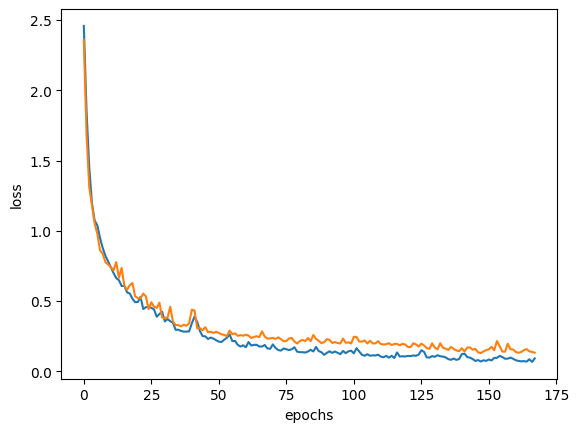

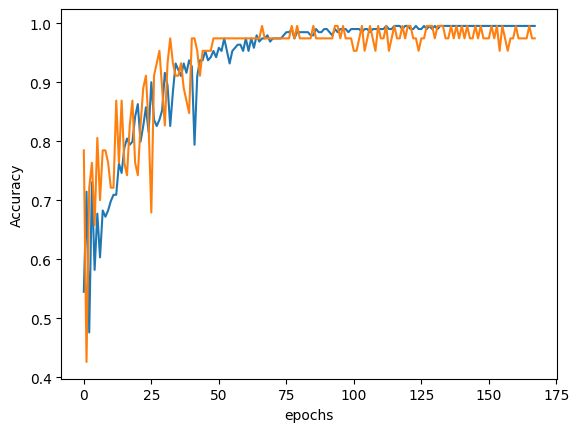

In [35]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt  





model = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])





# creating the model
#model = keras.models.Sequential(layers=None, name=None)

# first hidden layer
#model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))

# second hidden layer
#model.add(Dense(18, activation = 'relu'))

# output layer
#model.add(Dense(1, activation = 'linear'))



# Compiling the NN
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])
model.build(X_train.shape) 
model.summary()

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose = 1, patience=20)
# fitting the model to training data
network_history=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=300, callbacks=[early_stop])
history = network_history.history
losses = history['loss']
val_loss = history['val_loss']
accuracies = history['accuracy']
val_accuracies = history['val_accuracy']
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(losses)
plt.plot(val_loss)

plt.figure()
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracies)


In [ ]:
prediction= model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

# Prediction accuracy

In [ ]:
model.evaluate(X_test, y_test)

pred = model.predict(X_test)


2/2 [==============================] - 0s 6ms/step


In [ ]:
type(y_test) 

numpy.ndarray

In [ ]:
y_test1 = pd.DataFrame(y_test)

In [ ]:
pred

In [36]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 9.9 MB/s eta 0:00:00


In [ ]:
X_train_1 = pd.DataFrame(X_train)

# Model Interpretation using Shap

In [37]:
import shap
# compute SHAP values
explainer = shap.KernelExplainer(model, X_train)
shap_values = explainer.shap_values(X_test) 

  0%|          | 0/47 [00:00<?, ?it/s]

In [38]:
features = list(X_train.columns)

In [39]:
print(features)

['Hospital Service Area', 'Hospital County', 'Permanent Facility Id', 'Facility Name', 'Age Group', 'Length of Stay', 'Type of Admission', 'Patient Disposition', 'Discharge Year', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Emergency Department Indicator']


## Summary SHAP plot
This order is showing the impact of features on prediction. It shows the absolute SHAP value (regardless of positive or negative)

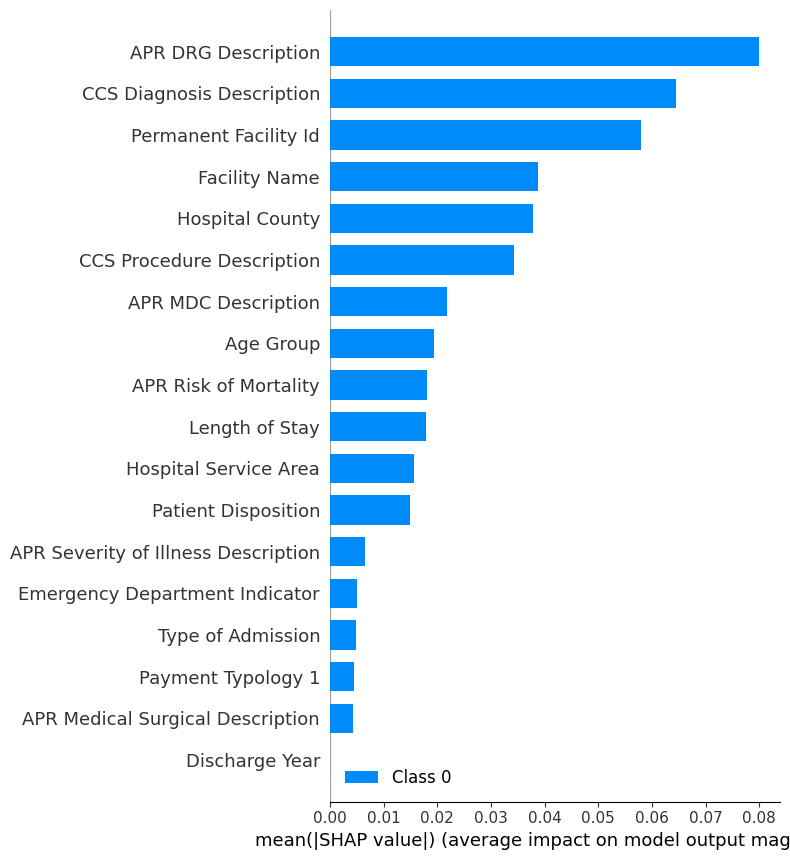

In [41]:
# Create summary_plot
shap.summary_plot(shap_values, X_test)

Here we see that APR DRG Description affects the model most and Discharge year affects the least.

In [42]:
print(len(features))

18


## Force Plot
Force plots shows the features contribution to the model’s prediction for a specific observation.

In [43]:
shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features = features)

For the first individual, the average predicted value is 0.02. 
The risk factors (which increases the final predicted value are to the left of this 0.02. ie. CCS Diagnosis, Hospital Service area etc. The low risk factors are to the right.)

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features = features)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


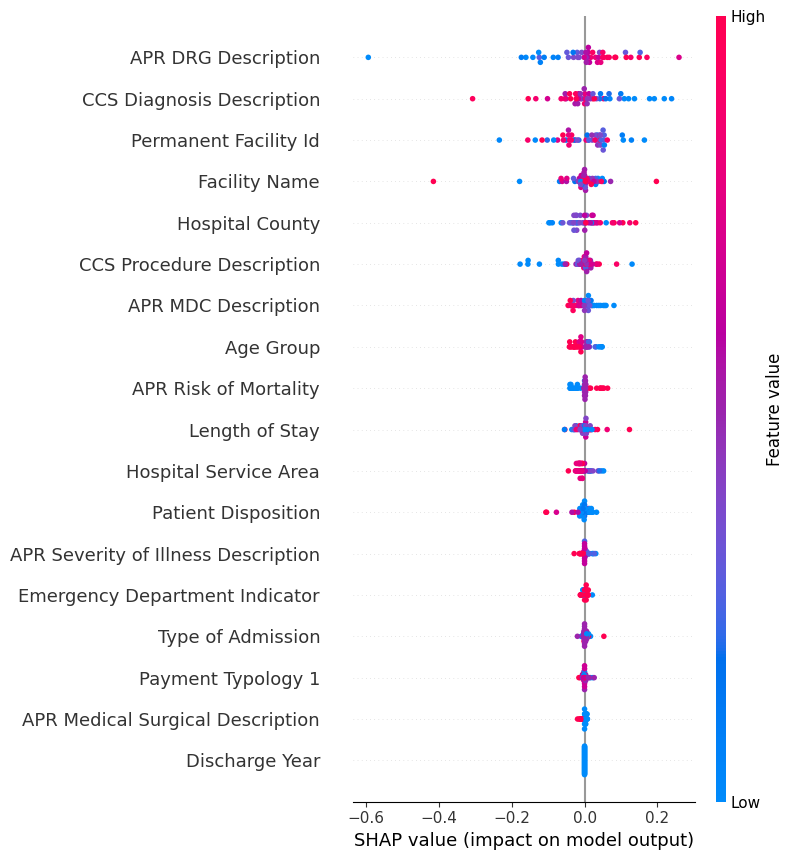

In [44]:
shap.summary_plot(shap_values[0], X_test, feature_names=features) 

* The summary plot combines feature importance with feature effects.
* The side colors bar from high to low indicate the value of the feature. 
* The features are sorted by the decreasing absolute average shapely value over all the columns in the data. 
* Each point represents a row from the original dataset.
* In the summary plot, we see first indications of the relationship between the value of a feature and the impact on the prediction.


In [ ]:
#Shapley values tell us how to fairly distribute  the prediction among the features.

# SHAP Interaction Plots

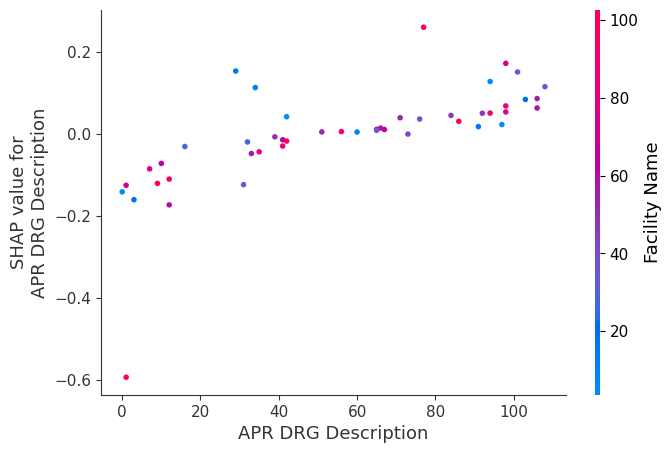

In [51]:
shap.dependence_plot("APR DRG Description",shap_values[0],X_test)